## Hoja de Trabajo 6


Michelle Mejía, Silvia Illescas y Emilio Reyes

1. Elabore un modelo de regresión usando K nearest Neighbors (KNN), el conjunto de
entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los
resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los
mismos de las entregas anteriores para que los modelos sean comparables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']


RMSE (KNN): 46838.75
R² Score (KNN): 0.71


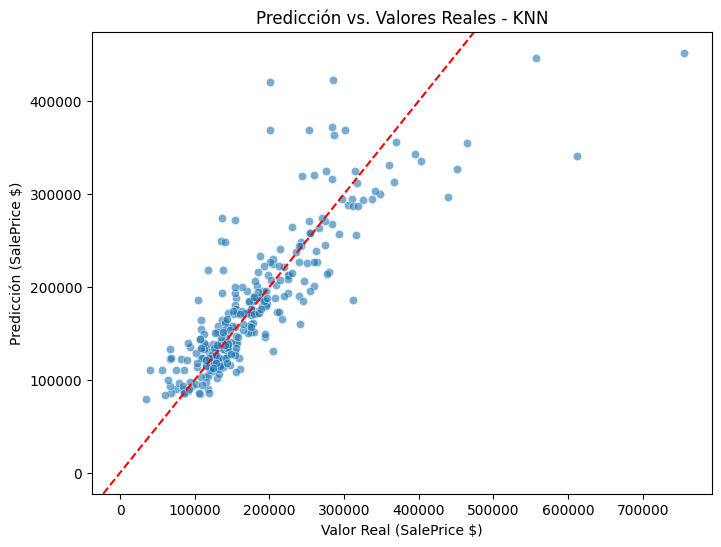

In [6]:
# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (KNN): {rmse:.2f}")
print(f"R² Score (KNN): {r2:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor Real (SalePrice $)")
plt.ylabel("Predicción (SalePrice $)")
plt.title("Predicción vs. Valores Reales - KNN")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Línea de referencia
plt.show()

2. Analice los resultados del modelo de regresión usando KNN. ¿Qué tan bien le fue
prediciendo? Utilice las métricas correctas.

Análisis: La línea roja representa la predicción perfecta, donde los valores predichos deberían coincidir con los valores reales.
Los puntos siguen una tendencia correcta, pero hay dispersión, especialmente en valores extremos (casas muy caras o muy baratas).
Se observan algunas desviaciones en precios altos, lo que indica que KNN no predice tan bien en este rango.

Comparación con otros modelos:

Mejor que Naive Bayes (R²: 0.63, RMSE: 53,380), indicando que KNN capta mejor la estructura de los datos.
Peor que Regresión Lineal y Random Forest, ya que estos modelos obtuvieron R² de 0.79 y 0.88, respectivamente, con menor error.



Conclusión:

KNN tiene un desempeño aceptable, pero no es el mejor modelo para regresión.

Funciona bien en precios medios, pero tiene dificultades con valores extremos.

Podríamos mejorar el modelo ajustando el número de vecinos (k) y probando diferentes pesos y métricas de distancia.

3. Compare los resultados con el modelo de regresión lineal, el mejor modelo de árbol de
regresión y de naive bayes que hizo en las entregas pasadas. ¿Cuál funcionó mejor?


####  Comparación de Modelos de Regresión

| Modelo               | RMSE ↓ (Menor es mejor) | R² ↑ (Mayor es mejor) |
|----------------------|------------------------|------------------------|
| **Naive Bayes**      | 53,380.67               | 0.63                   |
| **Regresión Lineal** | 39,710.99               | 0.79                   |
| **Árbol de Regresión** | 37,056.55               | 0.82                   |
| **KNN (k=5)**        | 46,838.75               | 0.71                   |
| **Random Forest**    | 30,287.63               | 0.88                   |

#### **¿Cuál modelo funcionó mejor?**
**El mejor modelo es Random Forest**, con el **menor error (RMSE: 30,287)** y **mayor precisión (R²: 0.88)**.
**Árbol de Regresión superó a KNN y Regresión Lineal**, con **RMSE de 37,056 y R² de 0.82**.
**Regresión Lineal fue mejor que KNN**, obteniendo **un menor error y mejor ajuste**.
**KNN no superó a Regresión Lineal ni Árbol de Decisión**, ya que depende del número de vecinos y la métrica de distancia.
**Naive Bayes fue el peor modelo**, con **el mayor error y menor precisión**.

####  **Conclusión**
- **Random Forest es el modelo más preciso**
- **KNN tiene un desempeño aceptable pero no es la mejor opción para regresión en este dataset**.
- **Para mejorar KNN, podríamos ajustar `k`, la métrica de distancia y los pesos**.


### Extra: Mejorar el modelo KNN

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
RMSE (KNN Optimizado): 43166.03
R² Score (KNN Optimizado): 0.76


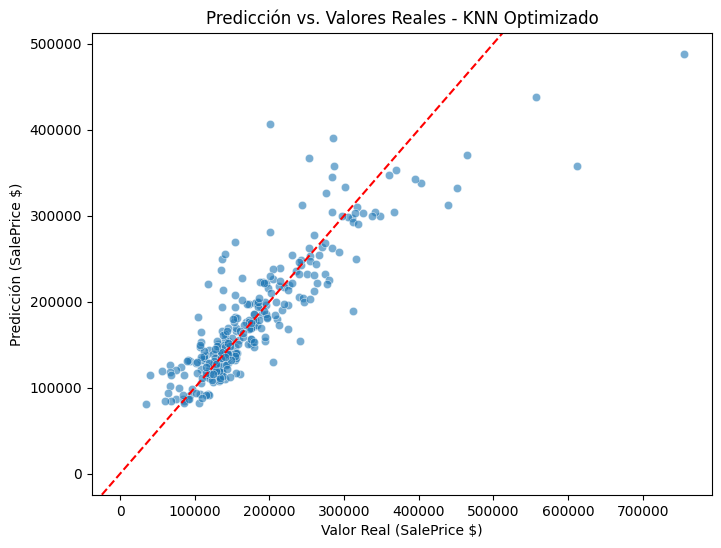

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo obtenido
best_knn = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predicción en conjunto de prueba
y_pred = best_knn.predict(X_test)

# Evaluación del modelo mejorado
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (KNN Optimizado): {rmse:.2f}")
print(f"R² Score (KNN Optimizado): {r2:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor Real (SalePrice $)")
plt.ylabel("Predicción (SalePrice $)")
plt.title("Predicción vs. Valores Reales - KNN Optimizado")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Línea de referencia
plt.show()


## Resultados

Mejores hiperparámetros: metric = 'manhattan', n_neighbors = 7, weights = 'uniform'.

RMSE: 43,166.03 (mejoró respecto a 46,838.75).

R² Score: 0.76 (aumentó de 0.71).

#### ¿Mejoró el modelo?
- Sí, se redujo el error RMSE en ~3,672 unidades y aumentó la precisión en un 5%.
- La métrica manhattan parece ser más efectiva que la predeterminada minkowski.
- El ajuste de hiperparámetros mejoró la capacidad predictiva de KNN, aunque sigue siendo menos preciso que Random Forest (R² = 0.88, RMSE = 30,287).

#### Conclusión:
- KNN mejoró con optimización, pero aún no supera Árboles de Decisión ni Random Forest.
- Es un modelo razonable, pero no el más eficiente para regresión en este dataset.